# Gradients

refs: 
* Book: Elements of Statistical Learning
* https://www.deeplearningbook.org/  <== This is a goodreference for Deep Learning
* https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing
* https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
* https://www.youtube.com/watch?reload=9&v=Ne3hjpP7KSI
* https://github.com/bhattbhavesh91/gradient-descent-variants/blob/master/gradient-descent-variants-notebook.ipynb
* https://github.com/bhattbhavesh91/gradient-descent-variants
* https://intellipaat.com/community/41845/what-is-the-difference-between-a-cost-function-and-a-loss-function-in-machine-learning
* math demonstrations:
    * https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated/278812 
    * https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d
    * https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
* Explanations and equeations about momentum and others optmizers:
    * https://vzahorui.net/optimization/gradient-descent/
    
* Vidsual animations: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

In this notebook, we review some main concepts in deep learning and implement the 3 main gradient descent algorithms using the NumPy library for linear regression and logistic regression.

--------
Terms used in deep learning:

* epoch: one pass over the entire data
* 1 step: update the parameters
* B: mini-batch size

ref: https://towardsdatascience.com/learning-parameters-part-3-ee8558f65dd7

| Gradient Algo                     | #steps in epoch |
|-----------------------------------|-----------------|
| Vanilla or Batch Gradient Descent | 1               |
| Stochastic Gradient Descent       | N               |
| Mini Batch Gradient Descent       | N/B             |



Analogy with Gravity (My background is in Physics)

* Potential Energy => Loss Function
* Goal Minimize Potential Energy => Minimize Loss Function 
* Mountain (x,y,z) => Regression Coefficient ($\theta$)
* modify (x,y) to archive the goal => modify $\theta$ to achive the goal
* Bottom of the Bowl or mountain => Minimum Value of Loss (Error)


In [1]:
import numpy as np
import random as rand

import matplotlib
import matplotlib.pyplot as plt
# required for iteractive plot
%matplotlib notebook  

import seaborn as sns
from scipy import stats 

from sklearn.datasets import make_classification, make_blobs, make_regression

from typing import List, Set, Dict, Tuple, Optional, Union

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Cost, Loss and hypothesis function


* Hypothesis function $h_{\theta}(x, y)$
    1. It is the fucntional responsiple to do the mapping: (x -> y). It is the model you pick that you believe is the best to solve the task. 
    1. Ex in the context of Machine learning: linear regression, logistic regression and support vector machine all they have different $h_{\theta}(x, y)$. You neeed to determine the best by try and fail
    1. Ex context of deep learning: It is the different architecture you are tryng


The terms **Loss** and **Cost** functions are frequent used by meaning the same things, but there are differences.

* Loss function $\mathcal{L}(h_{\theta}(x^{(i)}), y_i)$
    1. It is the penality the algorithms pays by predicting $\hat{y}_i = h_{\theta}(x^{(i)}, y_i)$
        * if the estimation (prediction) is right $\hat{y}_i$, the penality should be zero
        * if the estimation (prediction) is wrong, the penality should increase with the difference between $\hat{y}_i$ and $y_i$
     1. It is a fucntion of data and not parameters. The parameters are assumed given and constant
     1. Examples of loss functions: Linear regression
     
$$
\mathcal{L}(x,y) =  \frac{1}{2} \left ( x \theta_1 + \theta_0 - y \right )^2 \\
h_{\theta_0,\theta_1}(x, y) = \left ( x \theta_1 + \theta_0 - y \right )^2
$$
     

* Cost function $J(\theta)$ 
    1. It is a function only of parameters. Data $x^{(i)},y_i$ are assumed as given and constant
    1. It is the average of the loss function over the dataset
    1. It means the average cost (penality) the algo paid for there mistakes over data sets or the complete batch
    
$$
J(\theta) = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(h_{\theta}(x^{(i)}), y_i)
$$

## Gradient descent


In machine learning we define the loss fucntion $L = L(y, h_{\theta}(X))$. This function is reponsible to penalize mistakes. The machine learning algorithm learns by minimizing this function. $\theta$ are the paremeters of the models, $X$ is the trainning data and $y$ are the labels. The term $h_{\theta}(X)$ is the hypothesis.  We define the cost function $J(\theta) = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(h_{\theta}(x^{(i)}), y_i)$. Notices that the cost function $J(\theta)$ depends of the trainning data $X$, $y$ as well, but is considered only a function of the parameters $\theta$. Bellow is the cost function for Multiple Linear Regression:

$
J(\theta) =  \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$

where $h_{\theta}(X) = X \theta$.

From calclulus, 

$
d J(\theta) = \nabla_{\theta} J(\theta) * d\theta
$

where $*$ is the scalar product or inner product. Because the $cos(a)$ function is maximun when $a=0$ ($d\theta$ and $\nabla_{\theta}$ are aligned in this situation), we know that the opposite direction of the gradient point to the direction that minimizes the cost function $J(\theta)$.

> PS: The opposite direction $\nabla_{\theta}J(\theta)$ minimizes the cost function. The gradient is a compass that instead of point North, it is always point downhill.


The algorithm is summarized as follow:
    
1. Start from a random point $\theta = \theta_0$

1. Repeat the steps

    1. update direction (find the direction to minimize $J(\theta)$): $\Delta \theta = -\eta \nabla_{\theta}J(\theta)$
    
    1. update the position (keep changing the parameters to minimize $J(\theta)$): $\theta = \theta + \Delta \theta$
    
where $\eta$ is the **learning rate**. 


## Notes about Gradients

**TODO:** Consider add this to another notebook

* Gradient Descent with momentum

    * The problem mmentum address is to speedup the steps in the regions where gradients is too small (Vanish). It helps the gradient:
        * escape from local small valleys 
        * speedup in plateuas and
        * also avoid stopping in saddle points
    * Intuition: adds term that can be understood as innertial term in the update 
    * Gradients tends to jiggle more when it is closed to minimum because the gradients are change directions. Othe siolutions try to address this peoblems: **AdaGrad**, **RMSProp** and **Adam (momentum+ RMSProp) (This is the best available right now)**
    
    
$
d\theta = \beta d\theta + \eta (1 - \beta)  \nabla_{\theta} J(\theta) 
$
    
Default value $\beta = 0.9$ works well in many situations
* $\beta = 0$: we have normall gardeints (no momentum)
* $\beta = 1$: oure momentum and the slopes (gradients) are ignored in the update




## Examples of cost functions and their gradients

### Linear Rgression

$
J(\theta) = \frac{1}{2n} \sum_i^n \left ( h_{\theta}(x_i) - y_i \right )^2
$

$
J(\theta) = \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$


$
\nabla_{\theta}J(\theta) = \frac{1}{n} X^t \left ( X\theta - y \right )
$

In [71]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_linear_regression(theta, X, y):
    
    n = X.shape[0]
    
    z = np.dot(X,theta) - y

    return np.dot(z.T,z)/2.0/n

def gradient_linear_regression(theta,X,y):
    
    n = X.shape[0]
    
    z = np.dot(X,theta) - y    
    grad = np.dot(X.T,z)
    
    #print(f"theta.shape: {theta.shape}; X.shape: {X.shape}; z.shape: {z.shape}; grad.shape: {grad.shape}")
    
    return grad/n

### Logistic Regression Sigmoid activation

* vectorized formula of the cost function: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

* Cost function is also calles **Cross-entropy** or **log loss**

**TODO:** Try to find a demonstartion of the vectorial version of the gradient using matrix derivative

$
J(\theta) = \frac{1}{n} \sum_i^n \left ( y^i log(h_{\theta}(x_i)) - (1 - y_i) log(1 - h_{\theta}(x_i)) \right ) \\
J(\theta) = - \frac{1}{n} \left ( y^t log(h(X\theta)) + (1 - y)^t log(1 - h(X\theta))  \right )
$

$
\nabla_{\theta}J(\theta) = X^t \left ( \sigma(X\theta) - y) \right )
$

where:

$
h(X\theta) = h(z) = \sigma(z) \equiv \frac{1}{1 + e^{-z}} \\
\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))  \\
z = X\theta
$


In [72]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_logistic_regression(theta, X, y):
    
    n = X.shape[0]
    z = np.dot(X,theta)  # nx1
    h = 1.0/(1.0 + np.exp(-z))  # activation: nx1
    
    cost = (-1.0/n)*(y^t*np.log(h) + (1-y)^t*(np.log(1-h))) # scalar
    
    return cost

def gradient_logistic_regression(theta,X,y):
    
    z = np.dot(X,theta)
    h = 1.0/(1.0 + np.exp(-z))  # activation
    
    return np.matmul(X.T,h - y)

### Minimizing a complex function

**TODO:**: Review eq. I think I have small bug in hte gradient equation

$
J(\theta_1, \theta_2) = A(\theta_1^2 + \theta_1 + \theta_2^2) + C e^{-\frac{1}{2\sigma^2} \left [ (\theta_1 - \mu_1)^2 + (\theta_2 - \mu_2)^2 \right ]}
$

$
\nabla_{\theta}J(\theta) = \frac{\partial}{\partial \theta_1 } J(\theta) \hat{\theta_1} + \frac{\partial}{\partial \theta_2 } J(\theta) \hat{\theta_2} \\
\frac{\partial}{\partial \theta_1 } J(\theta) = A(2\theta_1 + 1) - \frac{(\theta_1 - \mu_1)}{\sigma^2} C e^{-\frac{1}{2\sigma^2} \left [ (\theta_1 - \mu_1)^2 + (\theta_2 - \mu_2)^2 \right ]} \\
\frac{\partial}{\partial \theta_2 } J(\theta) = 2A\theta_2 - \frac{(\theta_2 - \mu_2)}{\sigma^2} C e^{-\frac{1}{2\sigma^2} \left [ (\theta_1 - \mu_1)^2 + (\theta_2 - \mu_2)^2 \right ]}  
$


In [73]:
from matplotlib import cm

def gen_function():
    
    A = 0.1
    C = -5.0
    A0 = 3.0 - 0.844  # Constant to make min of the cost function zero
    
    mu_1 = 3
    mu_2 = 4
    sigma = 2.0    
    
    def cost_function(theta, X=None, y=None):

        theta1 = theta[0]
        theta2 = theta[1]
        
        #A = 0.1
        cost = A*(theta1**2 + theta1 + theta2**2) + A0

        cost += C*np.exp(-0.5*((theta1-mu_1)**2 + (theta2-mu_2) ** 2)/sigma)

        return cost

    def gradient(theta,X,y):

        theta1 = theta[0]
        theta2 = theta[1]
        
        gaussian_cost = C*np.exp(-0.5*((theta1-mu_1)**2 + (theta2-mu_2) ** 2)/sigma)
        # dJ/dtheta_1 
        grad_theta1 = A*(2.0*theta1 + theta1) - (theta1-mu_1)/sigma/sigma* gaussian_cost
        grad_theta2 = A*2.0*theta2 - (theta2-mu_2)/sigma/sigma* gaussian_cost
        
        return np.array([grad_theta1,grad_theta2])
    
    return cost_function, gradient

cost_function, gradient = gen_function()

grid_size = 25
theta1 = np.linspace(-7, 7, grid_size)
theta2 = np.linspace(-7, 7, grid_size)

X = np.array([])
y = np.array([])

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_function(theta, X,y)

In [74]:
J_grid.min()
J_grid.max()

-0.16555665024973987

12.655999999999993

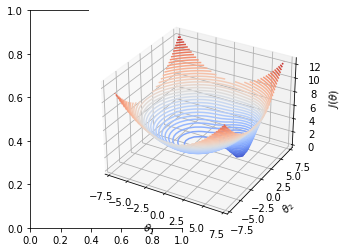

In [75]:
fig = plt.subplot(121)
ax = plt.axes(projection='3d')
ax.contour3D(Theta1, Theta2, J_grid, 50, cmap=cm.coolwarm)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$J(\theta)$');

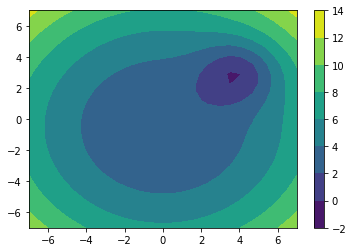

In [76]:
cp = plt.contourf(Theta1, Theta2, J_grid)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show();

## Batch Gradient descent



Batch gradient descent computes the gradient using the whole dataset. 

In [77]:
def gradient_descent(X,y, cost_func, gradient_func, learning_rate = 0.01, 
                     n_iterations = 100, init_guess=None):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess

    # FIXME: Saving 2 times initial values for parameters, gradients and cost func
#     cost_at_theta = cost_func(theta,X,y)
#     gradient_at_theta = gradient_func(theta,X,y)
    
#     theta_history[0, :] = theta.T
#     grad_history[0,:] = gradient_at_theta.T
#     cost_history[0] = cost_at_theta
    
    #print(f"theta0: {theta}")
    for it in range(0,n_iterations):

        # compute gradients and cost function
        cost_at_theta = cost_func(theta,X,y)
        gradient_at_theta = gradient_func(theta,X,y)

        # log history for ploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost_at_theta
        
        # update parameters
        dtheta = -learning_rate* gradient_at_theta
        theta = theta + dtheta
                
        #print(f"{it}: => theta: {theta.T}; grad: {gradient_at_theta.T}; cost: {cost_at_theta} ")
        #print(f"{it}: => theta.shape: {theta.shape}; grad.shape: {gradient_at_theta.shape}; cost: {cost_at_theta} ")

    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

### Training 

True parameters: 32.69


(300, 1)

(300,)

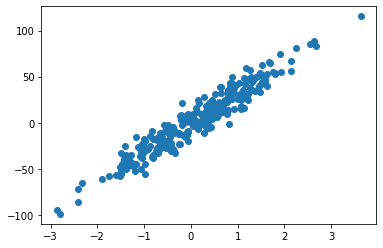

In [78]:
X, y, theta_true = make_regression(n_samples = 300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=10,  # <== This is related with the bayes error. The minimum the cost function can converted
                        coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")

X.shape
y.shape
plt.scatter(X,y)

In [79]:
%%time
lr = 0.05
n_iter = 100

init_guess = np.array([50.0])

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true:.2f}")


Initial Guess it: 0 => theta: [50.]; grad: [18.32942185]; cost: 209.80
it: 99 => theta: [32.06496807]; grad: [0.10501694]; cost: 44.49
Expected theta:32.69
CPU times: user 6.85 ms, sys: 4.38 ms, total: 11.2 ms
Wall time: 12 ms


### Checking the fit

We can inspect our solution by ploting the prediction against the data.

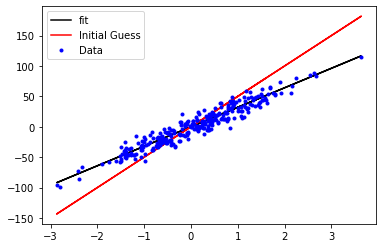

In [80]:
y_pred0 = np.dot(X,theta0)
y_pred = np.dot(X,theta)

plt.plot(X,y_pred,c='black', label='fit');
plt.plot(X,y_pred0,'r', label='Initial Guess');
plt.plot(X,y,'b.', label='Data');
plt.legend();

### Cost Function and  learning rate 

1. large: loss will explode
1. small: takes longer to learn
1. need to find the optmum learning rate

In [81]:
%%time
lr = 2.0
n_iter = 100

theta_big, history_big = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                          lr, n_iter, init_guess)

lr = 5e-3
n_iter = 100

theta, history_small = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                        lr, n_iter, init_guess)

CPU times: user 7.78 ms, sys: 5.93 ms, total: 13.7 ms
Wall time: 9.18 ms


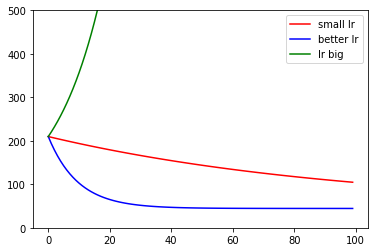

In [82]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history_small['cost'],'r',label='small lr');
_ = ax.plot(range(n_iter),history['cost'],'b',label='better lr');
_ = ax.plot(range(n_iter), history_big['cost'], 'g', label="lr big");
_ = ax.set_ylim([0, 500.0])
ax.legend();

### Changing bayes error

True parameters: 32.69


(300, 1)

(300,)

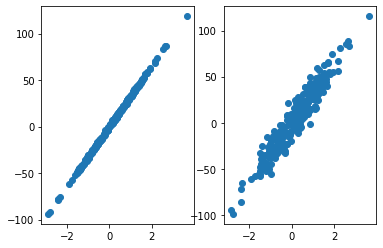

In [83]:
n_sample = 300
std_low_bayes_error = 1

X_low_bayes_error, y_low_bayes_error, theta_true = make_regression(n_samples = n_sample, 
                       n_features=1, 
                       n_informative=1, 
                       noise=std_low_bayes_error,  # <== Low bayes error
                        coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")


std_high_bayes_error = 10
X_high_bayes_error, y_high_bayes_error, theta_true = make_regression(n_samples = n_sample, 
                       n_features=1, 
                       n_informative=1, 
                       noise=std_high_bayes_error,  # <== High bayes error
                        coef=True,
                       random_state=2021)

X_low_bayes_error.shape
y_low_bayes_error.shape

_ = plt.subplot(121);
_ = plt.scatter(X_low_bayes_error,y_low_bayes_error);
_ = plt.subplot(122);
_ = plt.scatter(X_high_bayes_error,y_high_bayes_error);

plt.show()

In [84]:
%%time
lr = 0.05
n_iter = 100

init_guess = np.array([50.0])

theta, history_low_bayes_error = gradient_descent(X_low_bayes_error, y_low_bayes_error, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)


theta, history_high_bayes_error = gradient_descent(X_high_bayes_error, y_high_bayes_error, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)


CPU times: user 6.9 ms, sys: 2.42 ms, total: 9.33 ms
Wall time: 8.01 ms


**TODO:** Review this later

Remember for simple a linear regression:

$y = \hat{y} + \epsilon$

* $\epsilon$ is the bayes error 
* $\epsilon \sim N(h_{\theta}(x),\sigma^2)$

In [91]:
J_low_bayes_error = 1.0/2.0*pow(std_low_bayes_error,2)
std_low_bayes_error
J_low_bayes_error  # <= half of std^2

history_low_bayes_error['cost'][-1]

print()
J_high_bayes_error = 1.0/2.0*pow(std_high_bayes_error,2)
std_high_bayes_error
J_high_bayes_error # <= half of std^2

history_high_bayes_error['cost'][-1]

1

0.5

0.4498957115700963

10

50.0

44.491052934509085

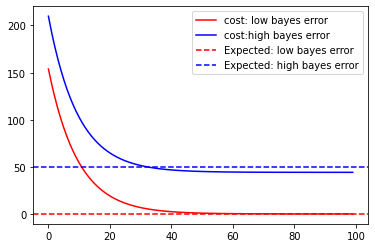

In [98]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history_low_bayes_error['cost'],'r',label='cost: low bayes error');
_ = ax.plot(range(n_iter),history_high_bayes_error['cost'],'b',label='cost:high bayes error');
_ = ax.axhline(y=J_low_bayes_error, color='r', linestyle='--',label='Expected: low bayes error');
_ = ax.axhline(y=J_high_bayes_error, color='b', linestyle='--',label='Expected: high bayes error');
ax.legend();

### Case: 2D feature space compare all approaches (Linear Regression)

(50, 2)

True parameters: [ -8.85178353 198.3533707 ]


(50, 2)

(50,)

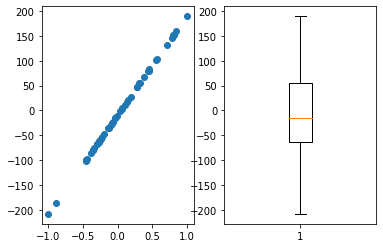

In [549]:
#Simulating data
X, y = make_regression(n_samples = 50, 
                       n_features=1, # Regression with 1 features has 2 parameters \theta_1,\theta_0  
                       n_informative=1, 
                       noise=1,
                       coef=False,# <= mean do not return true coefs
                       random_state=1)

X = np.interp(X, (X.min(), X.max()), (-1.0, 1.0))
#plt.boxplot(y)

x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)

n = X.shape[0]
_ones = np.ones((n,1))

X = np.hstack((_ones, X))
X.shape

theta_true = np.zeros(2)
theta_true[1] = slope
theta_true[0] = intercept

print(f"True parameters: {theta_true}")

X.shape
y.shape

_ = plt.subplot(121);
_ = plt.scatter(X[:,1],y);
_ = plt.subplot(122);
_ = plt.boxplot(y);

plt.show()

In [550]:
%%time
lr =0.05
n_iter = 300

init_guess = np.array([20, 300])

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true}")


Initial Guess it: 0 => theta: [ 20. 300.]; grad: [32.32145962 20.830653  ]; cost: 1525.28
it: 299 => theta: [ -9.08266818 203.80663273]; grad: [-0.04473924  1.05683079]; cost: 3.22
Expected theta:[ -8.85178353 198.3533707 ]
CPU times: user 8.12 ms, sys: 1.92 ms, total: 10 ms
Wall time: 11.7 ms


In [551]:
history['cost'][0:11]

array([1525.2804531 , 1452.82001039, 1385.96036107, 1324.18308714,
       1267.01983931, 1214.04745892, 1164.88357606, 1119.18263724,
       1076.6323207 , 1036.95030152,  999.88133244])

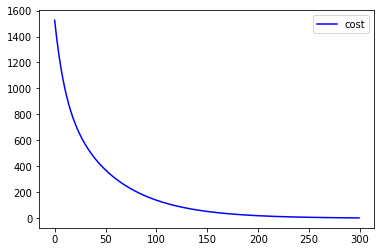

In [552]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['cost'],'b',label='cost');
#_ = ax.set_ylim([0, 1])
ax.legend();

Generating parameters space

In [553]:
grid_size = 300
theta1 = np.linspace(-20, 20, grid_size)
theta2 = np.linspace(150, 300, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

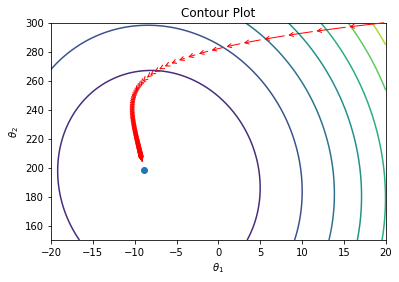

In [554]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)

thetas = [ history['theta'][k] for k in range(0, n_iter,3) ] 
for j in range(1,len(thetas)):
    _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center');

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

### Minimize complex function

**TODO** 


Start form different initial points and plot all paths. (I did this but I lost the code)

### Visualizing gradients in 2d with vector fields

**TODO:** This later

* 2d example with vector field
* https://stackoverflow.com/questions/63843310/how-to-plot-gradient-vector-on-contour-plot-in-python
* https://scipython.com/blog/visualizing-the-gradient-descent-method/

plot vector field
https://krajit.github.io/sympy/vectorFields/vectorFields.html

#### Linear Regression

**TODO**: https://scipython.com/blog/visualizing-the-gradient-descent-method/

In [ ]:
X, y, theta_true = make_regression(n_samples = 200, 
                       n_features=2, 
                       n_informative=1, 
                       noise=3,
                       coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true}")

# re scale X
X = np.interp(X, (X.min(), X.max()), (0.0, 1.0))

# re scale y


X.shape
y.shape
theta_true.shape

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, c="b");
ax.view_init(15, 60)
ax.set_xlabel(r'X1')
ax.set_ylabel(r'X2')
ax.set_zlabel(r'y');

* **Ploting parameter space**

In [ ]:
grid_size = 100
theta1 = np.linspace(-1, 1, grid_size)  # intercept
theta2 = np.linspace(-5, 5, grid_size)   # slope

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

cp = plt.contourf(Theta1, Theta2, J_grid)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show();

In [ ]:
# %%time
lr = 0.05
n_iter = 200

X_dummy = np.zeros((3,2))
y_dummy = np.zeros(3)

theta0 = np.array([7.0, 2.0])

theta, history = gradient_descent(X_dummy, y_dummy, cost_function, gradient, lr, n_iter, theta0)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")

In [ ]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['cost'],'b.',label='cost');
ax.legend();

## Stochastic Gradient Descent

refs: https://towardsdatascience.com/learning-parameters-part-3-ee8558f65dd7

In stochastic Gradient descent, instead of use the entire data $X$ to compute the gradients, we randonly peak one sample and use it to have an estimation of the gradients at that point. The estimation will not be accurate, but in average the algorithm will converge to an optimal solution. The lagorithm is ilustrade bellow:

* Start with initi guess: $\theta$

* for each iteration

    1. Sample a mini batch of $m$ samples: $X_{mini}: {X_1, X_2, .., X_m}$ and $y_1, y_2, ..., y_m$
    1. Compute the gradients
    1. update the parameters $\theta$


In [261]:
def stochastic_gradient_descent(X,y, cost_func, gradient_func, 
                                learning_rate = 0.01, n_iterations = 100, 
                                init_guess=None):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess

    cost_at_theta = cost_func(theta,X,y)
    gradient_at_theta = gradient_func(theta,X,y)
    
    theta_history[0, :] = theta.T
    grad_history[0,:] = gradient_at_theta.T
    cost_history[0] = cost_at_theta
    
    #print(f"theta0: {theta}")
    for it in range(1,n_iterations):

        cost = 0.0
        
        # take n random samples of size 1 of the data 
        for i in range(n):
    
            rand_ind = np.random.randint(0, n)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind]#.reshape(1, 1)
            
            #print(f"{it}, {rand_ind}: => X_i.shape: {X_i.shape};y_i: {y_i.shape}; cost: {cost} ")

            # compute the gradients and cost function
            cost_at_theta = cost_func(theta,X_i,y_i)
            gradient_at_theta = gradient_func(theta,X_i,y_i)  # gradient approximation using 1 data point

            # update parameters
            #dtheta = -learning_rate* gradient_at_theta/n
            dtheta = -learning_rate* gradient_at_theta
            theta = theta + dtheta
            
            cost += cost_at_theta
            
        # log history for oploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost/n
        
        #print(f"{it}: => theta: {theta.T}; grad: {gradient_at_theta.T}; cost: {cost_at_theta} ")
        
    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

#### Case: 1D parameter sapce

True parameters: 32.69


(300, 1)

(300,)

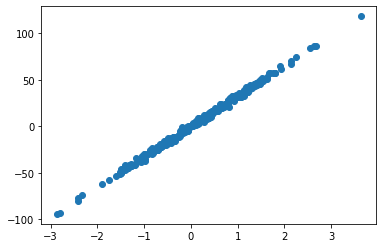

In [262]:
# Simulating data
X, y, theta_true = make_regression(n_samples = 300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=2,
                       coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")

X.shape
y.shape
plt.scatter(X,y)

In [266]:
%%time
lr =0.0005
n_iter = 100

init_guess = np.array([35])

theta, history = stochastic_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true:.2f}")


Initial Guess it: 0 => theta: [35.]; grad: [2.49528571]; cost: 4.84
it: 99 => theta: [32.52459849]; grad: [-0.06221732]; cost: 1.93
Expected theta:32.69
CPU times: user 802 ms, sys: 15.2 ms, total: 817 ms
Wall time: 1.03 s


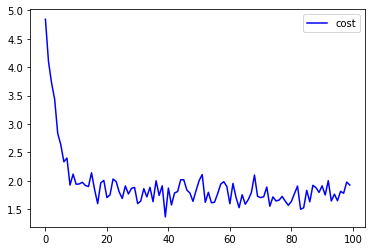

In [267]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['cost'],'b',label='cost');
#_ = ax.set_ylim([0, 0.7])
ax.legend();

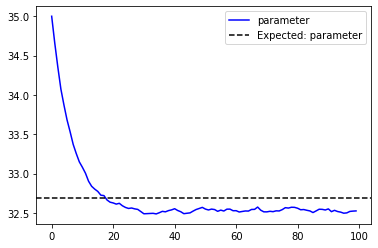

In [268]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['theta'],'b',label='parameter');
_ = ax.axhline(y=theta_true, color='k', linestyle='--',label='Expected: parameter');
# _ = ax.set_ylim([0, 25])
ax.legend();

#### Case: 2D parameters space

(50, 2)

True parameters: [ -8.85178353 198.3533707 ]


(50, 2)

(50,)

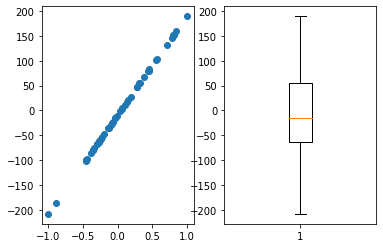

In [574]:
# Simulating data
X, y = make_regression(n_samples = 50, 
                       n_features=1, # Regression with 1 features has 2 parameters \theta_1,\theta_0  
                       n_informative=1, 
                       noise=1,
                       coef=False,# <= mean do not return true coefs
                       random_state=1)

X = np.interp(X, (X.min(), X.max()), (-1.0, 1.0))
#plt.boxplot(y)

x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)

n = X.shape[0]
_ones = np.ones((n,1))

X = np.hstack((_ones, X))
X.shape

theta_true = np.zeros(2)
theta_true[1] = slope
theta_true[0] = intercept

print(f"True parameters: {theta_true}")

X.shape
y.shape

_ = plt.subplot(121);
_ = plt.scatter(X[:,1],y);
_ = plt.subplot(122);
_ = plt.boxplot(y);

plt.show()

In [591]:
%%time
lr = 0.001
n_iter = 350

init_guess = np.array([20, 300])

theta, history = stochastic_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true}")


Initial Guess it: 0 => theta: [ 20. 300.]; grad: [32.32145962 20.830653  ]; cost: 1525.28
it: 349 => theta: [ -9.01999865 201.82998072]; grad: [-0.32871549  0.08760147]; cost: 1.31
Expected theta:[ -8.85178353 198.3533707 ]
CPU times: user 429 ms, sys: 10 ms, total: 439 ms
Wall time: 462 ms


In [592]:
history['cost'][0:11]

array([1525.2804531 , 2107.03058155,  918.03174599, 1237.59876444,
       1224.29347983, 1086.21756381, 1543.83986231,  908.68394395,
        957.37512261, 1256.19688598, 1088.0094796 ])

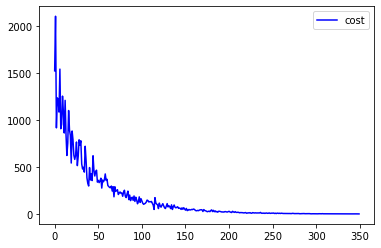

In [593]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['cost'],'b',label='cost');
#_ = ax.set_ylim([0, 1])
ax.legend();

Generating parameters space

In [594]:
grid_size = n_iter
theta1 = np.linspace(-20, 20, grid_size)
theta2 = np.linspace(150, 300, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

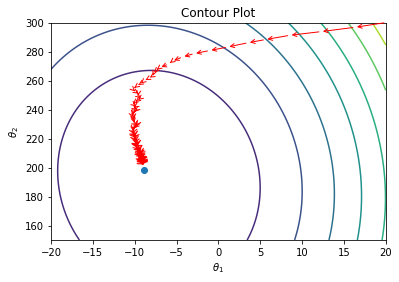

In [595]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)

thetas = [ history['theta'][k] for k in range(0, n_iter,3) ] 
for j in range(1,len(thetas)):
    _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center');

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

## Mini Batch Gradient Descent


In the case of mini-batch, instead of making an update with gradients of one data point at a time, we calculate gradients of a batch of data points of size B. 


In [356]:
X = np.array([[1,2],[-2,-2],[3,3], [4,4]])
X

y = np.array([1,2,3,4]).reshape((4,1))
y.shape
y

data_shuffle = np.hstack((X,y))
data_shuffle

print("shuffle")
# in-place shuffle
np.random.shuffle(data_shuffle)
data_shuffle


print("shuffle again")
# in-place shuffle
np.random.shuffle(data_shuffle)
data_shuffle

X_shuffle = data_shuffle[:, :-1]
y_shuffle = data_shuffle[:, -1]

X_shuffle
y_shuffle

array([[ 1,  2],
       [-2, -2],
       [ 3,  3],
       [ 4,  4]])

(4, 1)

array([[1],
       [2],
       [3],
       [4]])

array([[ 1,  2,  1],
       [-2, -2,  2],
       [ 3,  3,  3],
       [ 4,  4,  4]])

shuffle


array([[ 3,  3,  3],
       [-2, -2,  2],
       [ 4,  4,  4],
       [ 1,  2,  1]])

shuffle again


array([[ 1,  2,  1],
       [ 4,  4,  4],
       [ 3,  3,  3],
       [-2, -2,  2]])

array([[ 1,  2],
       [ 4,  4],
       [ 3,  3],
       [-2, -2]])

array([1, 4, 3, 2])

In [234]:
n = 10
data = np.array([1,2,3,4,5,6,7,8,9,10])
batch_size = 3

data[9:12]  # numpy array take care of index, no segmentatio fault


array([10])

In [340]:
 np.random.randint(0, n,3)

array([ 3, 45, 37])

In [357]:
# TODO: Change create_mini_batche to shuffle the shuffled data like in:
# https://ruder.io/optimizing-gradient-descent/
# https://realpython.com/gradient-descent-algorithm-python/
# https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/
# Test if I have the behavor I am expecting
# oscilation stochsstic > mini > vanila
# faster (needs less epoch): stochstic < mini < vanila
def create_mini_batches(X,y, batch_size):
    
    n = X.shape[0]
    data_shuffle = np.hstack((X,y.reshape((n,1))))
    
    #print(f"data_shuffle shape: {data_shuffle.shape}")
    
    # in-place
    np.random.shuffle(data_shuffle)
    
    n_mini_batches = n // batch_size
    
    rand_ind = np.random.randint(0, n, n_mini_batches)
    
#     print(f"ran_ind: {rand_ind}")
    
#     data_shuffle = data_shuffle[rand_ind,:]
    
    
    mini_batches = []
    
    k = 0
    while k*batch_size < n:
    
        # numpy array take care of the index. No segmentation at the end of the last 
        # mini-batch
        end_mini_batch = (k+1)*batch_size if (k+1)*batch_size < n else n
        mini_batch = data_shuffle[k*batch_size:(k+1)*batch_size,:]
        
        X_mini_batch = mini_batch[:, :-1]
        y_mini_batch = mini_batch[:, -1]
    
        mini_batches.append((X_mini_batch,y_mini_batch))
        k += 1
    
    return mini_batches


def mini_batch_gradient_descent(X,y, cost_func, gradient_func, 
                                learning_rate = 0.01, n_iterations = 100,
                                batch_size = 8,
                                init_guess=None,):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess

    cost_at_theta = cost_func(theta,X,y)
    gradient_at_theta = gradient_func(theta,X,y)
    
    theta_history[0, :] = theta.T
    grad_history[0,:] = gradient_at_theta.T
    cost_history[0] = cost_at_theta

#     theta_history = [ theta.T]
#     grad_history = [gradient_at_theta.T]
#     cost_history = [cost_at_theta]
    
    #print(f"theta0: {theta}")
    for it in range(n_iterations):

        cost = 0.0
        
        mini_batches = create_mini_batches(X,y,batch_size)
        n_bs = len(mini_batches)
        for X_mini, y_mini in mini_batches:
    
    
#             #rand_ind = np.random.randint(0, n)
#             X_i = X[i:i+batch_size,:]#.reshape(1, X.shape[1])
#             y_i = y[i:i+batch_size]#.reshape(1, 1)
            
            #print(f"{it}, {rand_ind}: => X_i.shape: {X_i.shape};y_i: {y_i.shape}; cost: {cost} ")

            # compute the gradients and cost function
            cost_at_theta = cost_func(theta,X_mini,y_mini)
            gradient_at_theta = gradient_func(theta,X_mini,y_mini)  # gradient approximation using 1 data point
                        
                
            # update parameters
            dtheta = -learning_rate* gradient_at_theta
            theta = theta + dtheta
            
            cost += cost_at_theta
            
#             theta_history.append(theta.T)
#             grad_history.append(gradient_at_theta.T)
#             cost_history.append(cost_at_theta)
            
        # log history for oploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost/n_bs
        
        #print(f"{it}: => theta: {theta.T}; grad: {gradient_at_theta.T}; cost: {cost_at_theta} ")
        
    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

In [358]:
# Verifying create_mini_batches function
X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
X.shape
X

y = np.array([1,2,3,4,5]).T
y.shape
y

for bs in [1,2,3,5]:
    print(f"bs: {bs}")
    create_mini_batches(X,y,bs)
    
# create_mini_batches(X,y,2)
# create_mini_batches(X,y,3)
# create_mini_batches(X,y,5)

(5, 2)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

(5,)

array([1, 2, 3, 4, 5])

bs: 1


[(array([[1, 1]]), array([1])),
 (array([[2, 2]]), array([2])),
 (array([[4, 4]]), array([4])),
 (array([[5, 5]]), array([5])),
 (array([[3, 3]]), array([3]))]

bs: 2


[(array([[2, 2],
         [5, 5]]),
  array([2, 5])),
 (array([[3, 3],
         [4, 4]]),
  array([3, 4])),
 (array([[1, 1]]), array([1]))]

bs: 3


[(array([[4, 4],
         [5, 5],
         [3, 3]]),
  array([4, 5, 3])),
 (array([[1, 1],
         [2, 2]]),
  array([1, 2]))]

bs: 5


[(array([[5, 5],
         [4, 4],
         [1, 1],
         [3, 3],
         [2, 2]]),
  array([5, 4, 1, 3, 2]))]

(50, 2)

True parameters: [ -8.85178353 198.3533707 ]


(50, 2)

(50,)

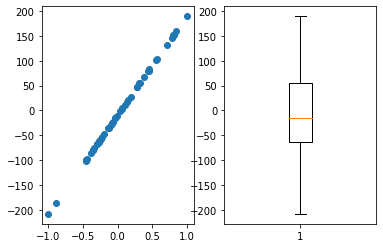

In [359]:
n_samples = 50 
X, y = make_regression(n_samples = n_samples, 
                       n_features=1, 
                       n_informative=1, 
                       noise=1,
                       coef=False,
                       random_state=1)


X, y = make_regression(n_samples = 50, 
                       n_features=1, # Regression with 1 features has 2 parameters \theta_1,\theta_0  
                       n_informative=1, 
                       noise=1,
                       coef=False, # <= mean do not return true coefs
                       random_state=1)


X = np.interp(X, (X.min(), X.max()), (-1.0, 1.0))
#plt.boxplot(y)

x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)

n = X.shape[0]
_ones = np.ones((n,1))

X = np.hstack((_ones, X))
X.shape

theta_true = np.zeros(2)
theta_true[1] = slope
theta_true[0] = intercept

print(f"True parameters: {theta_true}")

X.shape
y.shape

_ = plt.subplot(121);
_ = plt.scatter(X[:,1],y);
_ = plt.subplot(122);
_ = plt.boxplot(y);

plt.show()

### Case: 2D feature space compare all approaches (Linear Regression)

In [625]:
%%time
lr = 0.003
n_iter = 350

init_guess = np.array([20, 300])

history = dict()
batch_sizes = [('sthocastic',1, 0.001),('mini',4, 0.001),('vanila',n_samples,0.01 )]

for name, bs, lr in batch_sizes:

    theta, history[name] = mini_batch_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter,bs, init_guess)

    print(f"{name}, bs: {bs}")
    theta0 = history[name]['theta'][0]
    grad0 =  history[name]['grad'][0]
    cost0 = history[name]['cost'][0]

    print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

    it = n_iter -1
    theta = history[name]['theta'][-1]
    grad =  history[name]['grad'][-1]
    cost = history[name]['cost'][-1]

    print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
    print(f"Expected theta:{theta_true}")
    print()

sthocastic, bs: 1
Initial Guess it: 0 => theta: [ 18.42729501 298.96302915]; grad: [-18.24340943   8.2828584 ]; cost: 1491.51
it: 349 => theta: [ -8.99413877 201.71885254]; grad: [1.94729584 1.10186671]; cost: 1.44
Expected theta:[ -8.85178353 198.3533707 ]

mini, bs: 4
Initial Guess it: 0 => theta: [ 19.6073722  299.72612541]; grad: [-17.57303286  27.50376971]; cost: 1502.89
it: 349 => theta: [-10.23322154 240.02801225]; grad: [0.66654396 1.19315449]; cost: 163.90
Expected theta:[ -8.85178353 198.3533707 ]

vanila, bs: 50
Initial Guess it: 0 => theta: [ 19.6767854  299.79169347]; grad: [32.32145962 20.830653  ]; cost: 1525.28
it: 349 => theta: [-10.02736526 249.23404527]; grad: [0.57030124 9.91352433]; cost: 252.69
Expected theta:[ -8.85178353 198.3533707 ]

CPU times: user 527 ms, sys: 11.5 ms, total: 538 ms
Wall time: 567 ms


In [626]:
k = 11
for idx, alg in enumerate(batch_sizes):
    
    name, bs, lr = alg
    
    print(f"{idx}: {name} => bs:{bs}")
    history[name]['cost'][:k]

0: sthocastic => bs:1


array([1491.51414096, 1422.96528499, 1359.49330824, 1300.71089437,
       1246.24709402, 1195.62698065, 1148.49184433, 1104.50792667,
       1063.50005904, 1025.25370646,  989.45942566])

1: mini => bs:4


array([1502.89137961, 1472.93877202, 1423.70715181, 1435.11873154,
       1506.61276826, 1408.22664106, 1386.29518772, 1431.110407  ,
       1412.6139334 , 1457.17331277, 1335.91604687])

2: vanila => bs:50


array([1525.2804531 , 1510.55329254, 1496.05897378, 1481.79309146,
       1467.75132709, 1453.92944735, 1440.32330238, 1426.92882411,
       1413.74202465, 1400.75899471, 1387.97590199])

In [627]:
cost = history['mini']['cost']
m = len(cost)
m 
x = np.linspace(0,n_iter,m)
len(x)

x[0], cost[0]
x[-1], cost[-1]

350

350

(0.0, 1502.8913796125928)

(350.0, 163.89668256050987)

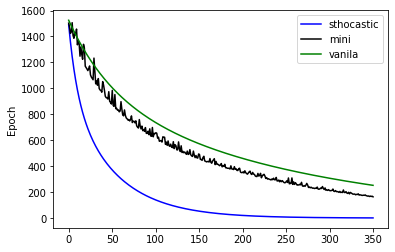

In [628]:
colors = ['b','k','g']

fig,ax = plt.subplots()
for idx, hyper_params in enumerate(batch_sizes):
    
    name, bs, lr = hyper_params
    
    cost = history[name]['cost']
    
    m = len(cost)
    x = np.linspace(0,n_iter,m)
    
    _ = ax.plot(x,cost,colors[idx],label=name);
    
#_ = ax.set_ylim([0, 5])
_ = ax.set_ylabel("Cost")
_ = ax.set_ylabel("Epoch")
ax.legend();

In [624]:
# Generatin 2d feature space
grid_size = n_iter
theta1 = np.linspace(-20, 20, grid_size)
theta2 = np.linspace(150, 300, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

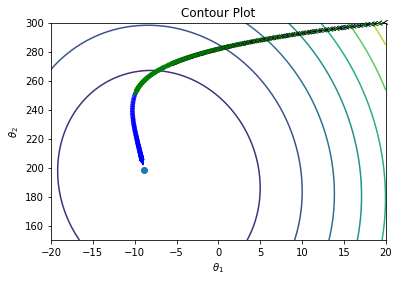

In [615]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)
colors = ['b','k','g']

for idx, hyper_params in enumerate(batch_sizes):
    name, bs, lr = hyper_params
    thetas = [ history[name]['theta'][k] for k in range(0, n_iter,3) ] 
    for j in range(1,len(thetas)):
        _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': colors[idx], 'lw': 1},
                   va='center', ha='center');

        
# thetas = [ history['theta'][k] for k in range(0, n_iter,5) ] 
# for j in range(1,len(thetas)):
#     _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
#                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
#                    va='center', ha='center');
        
plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

### TODO: Try to visualize vanish gradients and exploding gradients


with simulated data